# Analyzing Netflix's Success
## Spring 2024 Data Science Project
### Caroline Kumpa, Evyenia Zoulis, Tanya Gupta



Member 1: Caroline Kumpa, Contribution: 100%

Member 2: Evyenia Zoulis, Contribution: 90% (did not contribute to H)

Member 3: Tanya Gupta, Contribution: 95% (contributed minimally to H)

We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial.

Evyenia Zoulis May 7, 2024
Caroline Kumpa May 7, 2024
Tanya Gupta May 7, 2024




#1. Introduction
As cable television has began to fade and be replaced with various streaming services, Netflix has proved itself to be a giant, accounting for 31% of the international streaming service market share. When using these platforms, statistics are given to users based on their profile and viewing history, such as how much it matches to their taste or ranking on Netflix. As avid Netflix users, we wanted to see what other statistics we could derive and learn which metrics lend to making a show or movie successful on Netflix, a platform with thousands of movies and shows. The dataset we found has both quantitative data such as ratings and votes and qualitative data such as genre, director, and titles. In our exploratory analysis, we attempted to determine certain relationships between variables. We then applied machine learning concepts and skills learned throughout the semester to determine if we could predict the Box Office revenue based on various features such as genre, tags, language, country availability, director, and various other scores and metrics. As revenue is one of the main goals of many directors and production companies, is it possible to maximize your chances of making it big by selecting the most profitable variables? In addition, is there a way to predict genre based on other variables? Lastly, we explored to see if there was a strong relationship between directors and their IMDb Score, a very popular metric. Netflix has already entirely changed the way that we stream movies and series, and if media could be produced in a mechanical way to maximize profit and success, the joy and creativity of film could be even more damaged. We will explore these possibilities throughout our final project.

(https://backlinko.com/netflix-users)

#2. Data Curation
We got our dataset from Kaggle: https://www.kaggle.com/datasets/syedmubarak/netflix-dataset-latest-2021.

This is a vast dataset that has 29 features, and originally had almost 9500 rows before cleaning. This dataset was adapted from a FlixGem.com dataset, which is a website devoted to Netflix's "quality over quantity" issue. If you want to learn more about [FlixGem](https://https://flixgem.com/#), and specifically their special metric of "Hidden Gem Score", you can read [here](https://polymersearch.medium.com/flixgem-com-quickly-find-your-next-netflix-fix-d2af197007a6).

### Data Collection
We first imported the necessary libraries, followed by creating our dataframe from the linked dataset by reading the csv.

We then cleaned the data, as many rows contained blank entries. We decided to drop these rows to make it easier to utilize the data and make predictions. Below, you can get a sense of the dataframe and some of the features we will analyze.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scip
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Netflix Dataset Latest 2021.csv', sep = ',')

df.head(5)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,Unnamed: 29,Unnamed: 30
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube,NaN,NaN
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube,NaN,NaN
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube,NaN,NaN
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube,NaN,NaN


#3. Exploratory Data Analysis


### Summary Statistics
First, we will explore a little more about the data and print out some general statistics below to get a better sense of the dataframe.

In [ ]:
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 9425
Number of columns: 31


In [ ]:
column_names = df.columns
print("Column names: ")
print(column_names)

Column names: 
Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site', 'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')


In [ ]:
column_data_types = df.dtypes
print("Data types: ")
print(column_data_types)

Data types: 
Title                     object
Genre                     object
Tags                      object
Languages                 object
Series or Movie           object
Hidden Gem Score         float64
Country Availability      object
Runtime                   object
Director                  object
Writer                    object
Actors                    object
View Rating               object
IMDb Score               float64
Rotten Tomatoes Score    float64
Metacritic Score         float64
Awards Received          float64
Awards Nominated For     float64
Boxoffice                 object
Release Date              object
Netflix Release Date      object
Production House          object
Netflix Link              object
IMDb Link                 object
Summary                   object
IMDb Votes               float64
Image                     object
Poster                    object
TMDb Trailer              object
Trailer Site              object
Unnamed: 29              float

### Data Exploration

Next, we explored the relationships between different features in the dataset. By using the Chi-Squared test, the correlation coefficient, the T-statistic, and other statistical methods we were able to determine these
relationships.

#### Using the Chi-Squared test to see if there is a connection between view rating and runtime.

- HO: The runtime does not have an effect on the likelihood of the view rating.

- HA: The runtime does have an effect on the likelihood of the view rating.

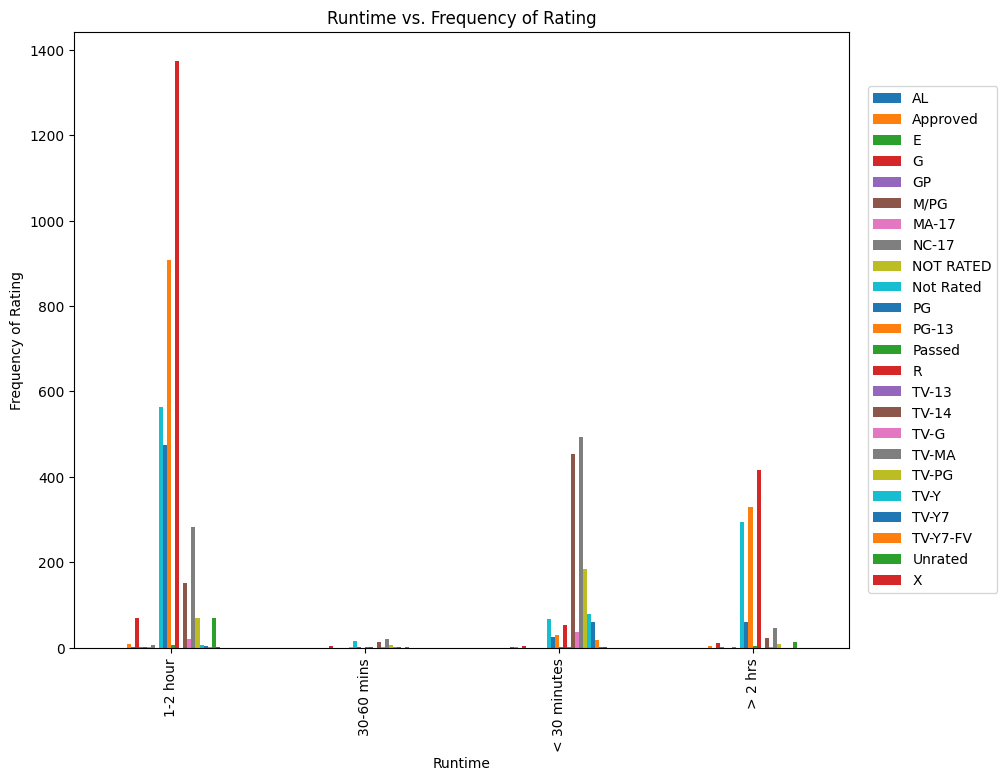

In [ ]:
from scipy.stats import chi2_contingency
table = pd.crosstab(df.Runtime, df["View Rating"])
table.plot(kind ="bar", figsize = (10, 8), ylabel = "Frequency of Rating", title = "Runtime vs. Frequency of Rating").legend(loc='right', bbox_to_anchor=(1.2, .5))

In [ ]:
print(f'The p-value is {chi2_contingency(table).pvalue: .25f}')
print("Therefore, since this is less than alpha, we accept the null hypothesis. There is no relationship between these variables.")

The p-value is  0.0000000000000000000000000
Therefore, since this is less than alpha, we accept the null hypothesis. There is no relationship between these variables.


This particular relationship is a dead end, so we will move on to analyzing other variable relationships. In our personal experience, we have seen movies unknown to us win awards and highly popular movies fail to win big at events such as the Academy Awards or the Golden Globes, so we want to explore the possibility of a relationship between box office revenues and awards.

We often make decisions about which movies and shows to watch or to avoid based on IMDb ratings, or we search for movies with Google searches such as “Best Horror Movies according to IMDb,” and so do millions of people internationally. It is an important metric that we want to explore further.
(https://www.filminquiry.com/useful-imdb-ratings-metacritics-scores/)


#### Is there a correlation between the number of awards received and the revenue made in the box office?


In [ ]:

boxoffice_dtype = df['Boxoffice'].dtype
awards_received_dtype = df['Awards Received'].dtype

print("Data type of 'Boxoffice' column:", boxoffice_dtype)
print("Data type of 'Awards Received' column:", awards_received_dtype)

Data type of 'Boxoffice' column: object
Data type of 'Awards Received' column: float64


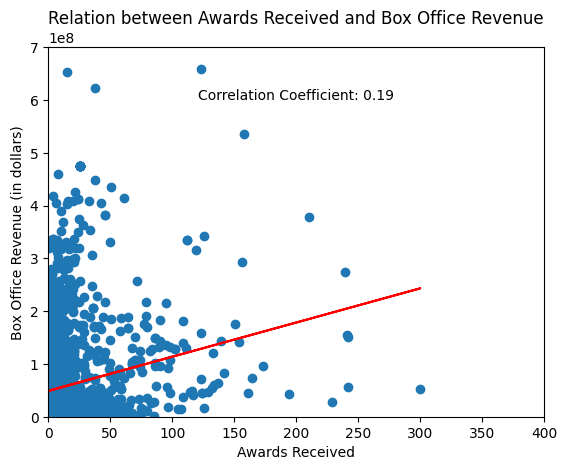

In [ ]:
import numpy as np

df_cleaned = df.dropna(subset=['Awards Received', 'Boxoffice'])

df_cleaned = df_cleaned.copy()

df_cleaned.loc[:, 'Boxoffice'] = df_cleaned['Boxoffice'].str.replace('$', '').str.replace(',', '').astype(int)

plt.scatter(df_cleaned['Awards Received'], df_cleaned['Boxoffice'])
plt.title('Relation between Awards Received and Box Office Revenue')
plt.xlabel('Awards Received')
plt.ylabel('Box Office Revenue (in dollars)')

plt.xlim(0, 400)
plt.ylim(0, 700000000)

# regression line
x = df_cleaned['Awards Received']
y = df_cleaned['Boxoffice'].astype('float64')
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b, color='red')

# correlation coefficient
correlation_coefficient = df_cleaned['Awards Received'].corr(df_cleaned['Boxoffice'].astype('float64'))
plt.text(200, 600000000, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=10, ha='center')

plt.show()

A correlation coefficient of .19 indicates that there is a slightly positive relationship between the number of awards received and the box office grossing. The regression line indicates that, while there is a slight positive relation, the data is very spread out. This spread indicates that, while there may be a slight positive relationship between awards and box office revenue, there are many other factors influencing box office success. It implies that winning awards alone may not guarantee high box office earnings for Netflix shows and movies, but that winning does play somewhat of a role. Factors such as marketing, genre, star power, critical acclaim, and timing of release could also play significant roles.

####Is there a correlation between the number of movies a director has directed and the IMBd score?

Correlation Coefficient: 0.48


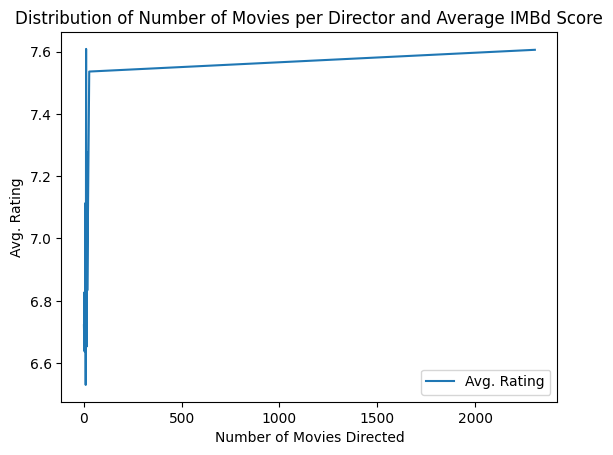

In [51]:
# Find the correlation between the amount of movies that a director has directed
# and the IMBd score
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
director_count = df.groupby('Director').count()
director_count_df = director_count.reset_index()[['Director', 'Title']]
director_count_df.rename({'Title':'Count'}, axis = 1, inplace = True)
director_count_df['Avg. Rating'] = df.groupby('Director').mean(numeric_only = True).reset_index()['IMDb Score']
final_df = director_count_df.groupby('Count').mean(numeric_only = True).reset_index()
correlation_coefficient = final_df['Count'].corr(final_df['Avg. Rating'])
final_df.plot(x = "Count", y = "Avg. Rating")
plt.ylabel('Avg. Rating')
plt.xlabel('Number of Movies Directed')
plt.title('Distribution of Number of Movies per Director and Average IMBd Score')
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

To conclude, there is a positive linear relationship between these two variables of **.61**. Therefore, there is a moderately positive correlation between the number of movies a director has directed and their IMDb rating. This makes sense as the more reputation and press around certain directors, the more they generate a fanbase and a consistent viewing population. In addition, the more experience that a director has, the better the content may be. We can also consider hidden causation, such as the idea that critics who did not enjoy a director's films are less likely to watch their subsequent movies, decreasing the amount of negative reviews. In the reverse, audiences who enjoyed the style and content of a particular director are more likely to watch more of their work and enjoy it comparatively more.

#### IMDb Scores for Movies versus TV Series

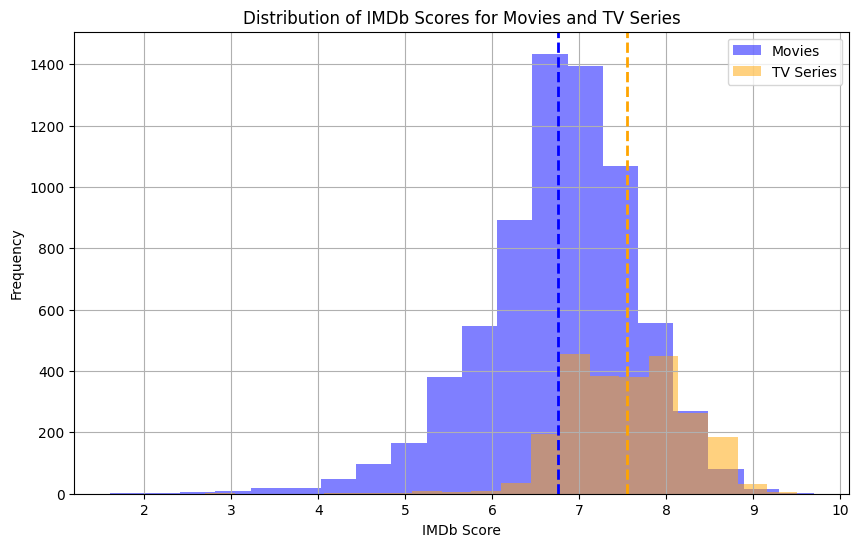

Mean IMDb score for Movies: 6.75
Mean IMDb score for TV Series: 7.54
T-statistic: -40.31
P-value: 0.0000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
evy = df.dropna(subset=['IMDb Score'])

# Separate data into movies and TV series
movies = evy[evy['Series or Movie'] == 'Movie']
tv_series = evy[evy['Series or Movie'] == 'Series']

# Descriptive statistics
movies_mean_imdb = movies['IMDb Score'].mean()
tv_series_mean_imdb = tv_series['IMDb Score'].mean()

# Hypothesis Testing
t_statistic, p_value = stats.ttest_ind(movies['IMDb Score'], tv_series['IMDb Score'])

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(movies['IMDb Score'], bins=20, alpha=0.5, label='Movies', color='blue')
plt.hist(tv_series['IMDb Score'], bins=20, alpha=0.5, label='TV Series', color='orange')
plt.axvline(movies_mean_imdb, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(tv_series_mean_imdb, color='orange', linestyle='dashed', linewidth=2)
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Scores for Movies and TV Series')
plt.legend()
plt.grid(True)
plt.show()

# Results
print(f"Mean IMDb score for Movies: {movies_mean_imdb:.2f}")
print(f"Mean IMDb score for TV Series: {tv_series_mean_imdb:.2f}")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")


Based on the results:

*  The mean IMDb score for movies is 6.75, while the mean IMDb score for TV series is 7.54.
*   The t-statistic is -40.31, indicating a substantial difference in means.
*   The p-value is very close to zero (0.0000), much lower than the typical significance level of 0.05. This suggests strong evidence against the null hypothesis.


Therefore, we reject the null hypothesis and conclude that there is a significant difference in IMDb scores between movies and TV series.





#### Outlier Analysis for Awards Nominated and Received and IMDb Score



<Axes: >

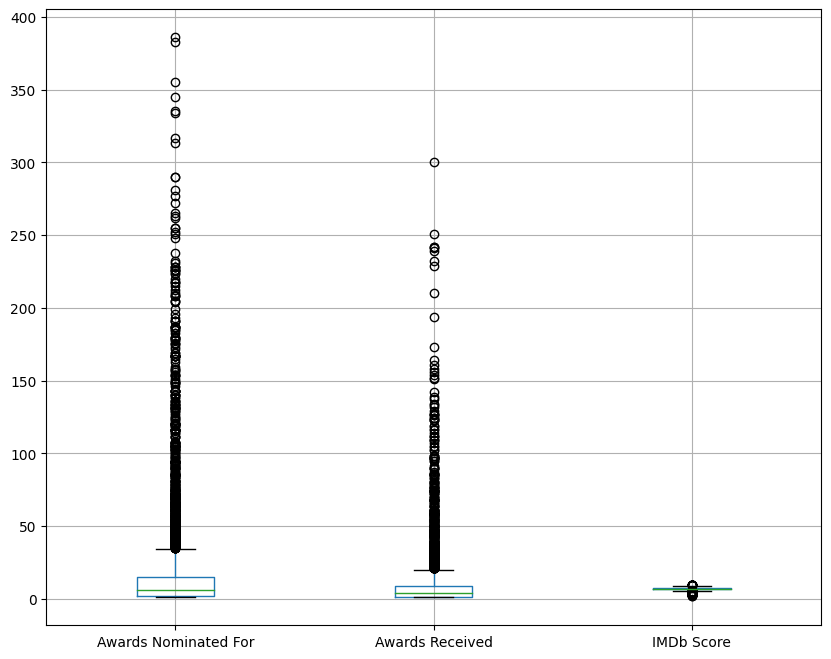

In [ ]:
df.boxplot(column = ["Awards Nominated For", "Awards Received", "IMDb Score"], figsize = (10, 8))

As you can see, the columns Awards Nominated For and Awards Recieved both have a many outliers. However, the given IMDb score has results that are much closer to the median.

The data reflects the fact that for certain hit movies, the median is close to 0. In other words, as you can see in the box ad whisker plot, 50% of the data is in the range from around 0 to 20 nominations. However, the extreme number of outliers most likely come from the vast number of hit movies that are on Netflix.

Similarly, in Awards Recieved, the interquartile range is quite short. This large number of outliers is most likely also due to the fact that only a select number of movies get awards, and when they do they recieve in large quantities due to the blockbuster nature of the media.

IMDb IQR is also short because of how it is restricted from 1-7. However, the mean lies around 7, which makes sense as Netflix has a selective process to determine what comes onto their platform.


#4. Primary Analysis

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier

In order to use these machine learning models and evaluate, we need to conduct some preprocessing. First, in order to predict using each individual genre, we will need to use one hot encoding.

We will split up the list of genres in each row into multiple columns, with ones and zeros representing their presence in each row.

In [ ]:
df['Genre'] = df['Genre'].apply(lambda x: x.split(",") if isinstance(x, str) else [])

mlb = MultiLabelBinarizer()
new_df = pd.DataFrame(mlb.fit_transform(df['Genre']), columns=mlb.classes_, index=df.index)
new_df = pd.concat([new_df, df], axis=1)
new_df.to_csv('output.csv')
new_df.drop('Genre', axis=1, inplace=True)  # Dropping the 'Genre' column inplace

Next, we will replace the categorical columns using codes.

*   Movies or Series will be given 1 or 0 respectively.
*   The runtimes will be adapted into their approximate minute runtimes.
*   For the directors and ratings, we will convert the column type to category and replace it with their respective code.




In [ ]:
df['Series or Movie'] = df['Series or Movie'].apply(lambda x: 0 if x == "Movie" else 1)
df['Runtime'] = df['Runtime'].apply(lambda x: 120 if x=="> 2 hrs" else 100 if x=="1-2 hour" else 30)

df["Boxoffice"] = df['Boxoffice'].replace('\$|,', '', regex=True)
df['Boxoffice'] = pd.to_numeric(df['Boxoffice'])

In [ ]:
df['Director'] = df['Director'].astype('category')
df['Director'] = df['Director'].cat.codes

df['View Rating'] = df['View Rating'].astype('category')
df['View Rating'] = df['View Rating'].cat.codes

In [ ]:
def lin_regression(X, Y):
  model = LinearRegression()
  X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size=0.2, random_state=42
  )
  model.fit(X_train, Y_train)
  Y_train_pred = model.predict(X_train)
  Y_test_pred = model.predict(X_test)

  plt.scatter(X_train, Y_train, color='blue', label='Train')
  plt.scatter(X_test, Y_test, color='orange', label='Test')
  plt.plot(X_train, Y_train_pred, color='green', label='Linear Regression')
  plt.title('Linear Dataset Regression')
  plt.legend()
  plt.show()

  # now, lets look at the errors
  mse_train = mean_squared_error(Y_train, Y_train_pred)
  mse_test = mean_squared_error(Y_test, Y_test_pred)
  r2_train = r2_score(Y_train, Y_train_pred)
  r2_test = r2_score(Y_test, Y_test_pred)

  print(f"  MSE Train: {mse_train:.4f}")
  print(f"  MSE Test: {mse_test:.4f}")
  print(f"  R2 Train: {r2_train:.4f}")
  print(f"  R2 Test: {r2_test:.4f}")

In [52]:
from sklearn.ensemble import RandomForestRegressor

def random_regression(X, Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


  model = RandomForestRegressor()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r_squared = r2_score(y_test, y_pred)

  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r_squared}")
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, y_pred)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line for reference
  plt.xlabel('Actual Boxoffice')
  plt.ylabel('Predicted Boxoffice')
  plt.title('Actual vs. Predicted Boxoffice')
  plt.show()

In [ ]:
def classification(X, Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

  model = RandomForestClassifier()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

We took a multifaceted approach to our analysis, employing various machine learning techniques to address different research questions. Firstly, we utilize linear regression to explore the relationship between predictors like genre, director, and viewer rating with box office revenue. This method allows for a clear understanding of how individual variables impact revenue, offering insights into maximizing profitability.

We use random forest regression to further explore revenue prediction. This method's ability to handle nonlinear relationships provides a more comprehensive understanding of the factors influencing box office success, which is crucial for decision-making in the entertainment industry.

Our use of random forest classification helps us predict genre-grouped data based on other variables. This allows us to discover patterns in Netflix content creation, and this predictive capability helps us understand audience preferences and how to tailor their offerings accordingly.

# 5. Visualizations

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

X_director = df[['Director']]

# One-hot encode the 'Director' feature
encoder = OneHotEncoder()
X_director_encoded = encoder.fit_transform(X_director)

# Handling missing values in the target variable Y
Y = df[['IMDb Score']]
imputer = SimpleImputer(strategy='mean')
Y_imputed = imputer.fit_transform(Y)

model = LinearRegression()

# Fit the linear regression model
model.fit(X_director_encoded, Y_imputed)

LinearRegression()

              precision    recall  f1-score   support

       False       0.81      0.93      0.86      2232
        True       0.38      0.16      0.23       596

    accuracy                           0.77      2828
   macro avg       0.59      0.55      0.55      2828
weighted avg       0.72      0.77      0.73      2828



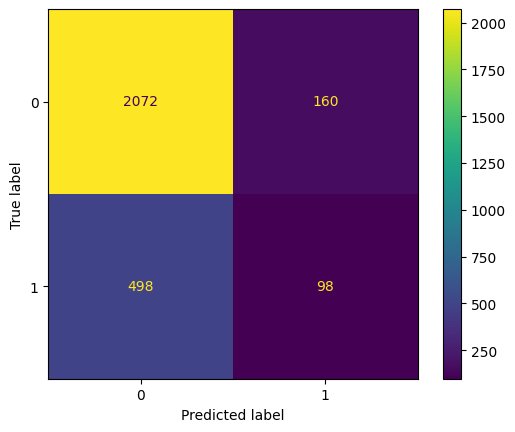

In [ ]:
X = df[['Director', 'View Rating', 'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score']]
Y = df['Genre'].apply(lambda x: len(x) == 1)

# Impute missing values in the input features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

classification(X_imputed,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-68-f4878f8d4c71>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Runtime'] = new_df['Runtime'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) and x.isdigit() else float('nan'))
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local

Mean Squared Error: 1336660194269866.5
R-squared: 0.7524296033267829


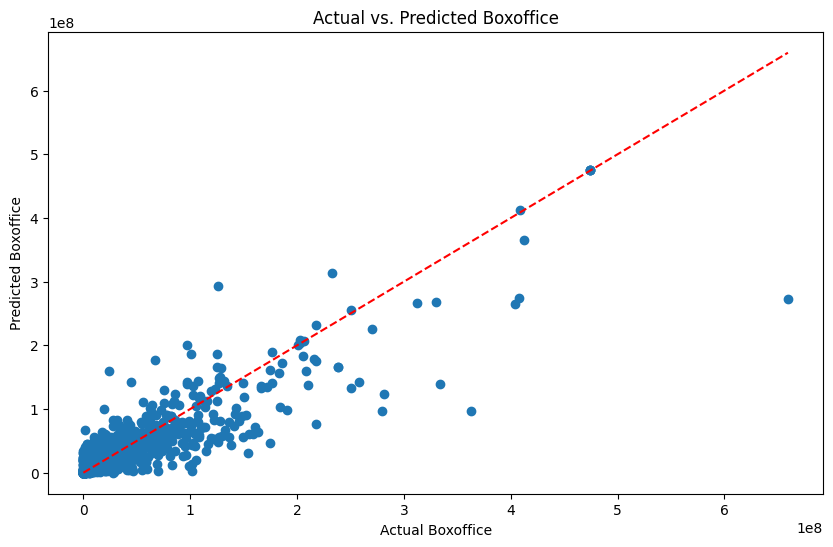

In [ ]:
X = new_df[['Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama',
            'Family', 'Fantasy', 'Horror', 'Music', 'Musical',
            'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
            'Western', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
            'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Music',
            'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
             'Series or Movie', 'Hidden Gem Score', 'Runtime', 'Director', 'View Rating', 'IMDb Score',
            'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
            'Awards Nominated For', 'IMDb Votes']]

# Perform one-hot encoding for the 'Series or Movie' column
encoder = OneHotEncoder(sparse=False)
series_or_movie_encoded = encoder.fit_transform(new_df[['Series or Movie']])

# Convert 'Runtime' column to numerical values, handling unexpected values
X['Runtime'] = new_df['Runtime'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) and x.isdigit() else float('nan'))

# Perform one-hot encoding for the 'Director' column
director_encoder = OneHotEncoder(sparse=False)
director_encoded = director_encoder.fit_transform(new_df[['Director']])

# Perform one-hot encoding for the 'View Rating' column
view_rating_encoder = OneHotEncoder(sparse=False)
view_rating_encoded = view_rating_encoder.fit_transform(new_df[['View Rating']])

# Concatenate the encoded columns with the rest of the features
X_encoded = pd.concat([
    X.drop(columns=['Series or Movie', 'Director', 'View Rating']),
    pd.DataFrame(series_or_movie_encoded, columns=encoder.get_feature_names_out(['Series or Movie'])),
    pd.DataFrame(director_encoded, columns=director_encoder.get_feature_names_out(['Director'])),
    pd.DataFrame(view_rating_encoded, columns=view_rating_encoder.get_feature_names_out(['View Rating']))
], axis=1)

# Impute missing values in X_encoded
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_encoded)

# Convert currency string to numerical format
Y = new_df['Boxoffice'].str.replace('$', '').str.replace(',', '').astype(float)

X_imputed = X_imputed[Y.notna()]  # Only keep rows in X that correspond to non-missing values in Y
Y = Y.dropna()  # Drop missing values from Y

y_pred = random_regression(X_imputed, Y)

# 6. Insights and Conclusions

**Conclusion:**


Precision measures the accuracy of positive predictions made by the model. Our model achieved a precision of 0.81 for the "False" class and 0.38 for the "True" class, indicating that when the model predicts that a movie or show is not in a specific genre, it is correct about 81% of the time, and when it predicts it is of that genre, it is correct about 38% of the time.

Our recall score of 0.93 for the "False" class and 0.16 for the "True" class indicates that the model captures 93% of all instances of the "False" class but only 16% of instances of the "True" class. A higher recall suggests that the model is better at identifying instances of that class among all actual instances.

Our computed F1-score of 0.86 for the "False" class and 0.23 for the "True" class suggests that the model performs better in predicting the "False" class compared to the "True" class.

Support indicates the number of actual occurrences of each class in the dataset. In this case, there are 2232 instances of the "False" class and 596 instances of the "True" class.

The results of this classification report suggest that the model performs reasonably well in predicting the majority class ("False"), with high precision, recall, and F1-score. However, its performance in predicting the minority class ("True") is relatively poor, with lower precision, recall, and F1-score. Improving the model's ability to correctly identify instances of the minority class could lead to more accurate genre predictions, which is essential for content recommendation systems and audience engagement on platforms like Netflix.

The scatterplot comparing actual versus predicted box office revenue, along with the associated metrics (Mean Squared Error and R-squared), provides insights into the performance of the regression model used to predict box office revenue.

The high R-squared value (0.75) suggests that the regression model explains a significant portion of the variability in box office revenue, indicating that the chosen features (such as genre, director, viewer rating) are meaningful predictors of revenue.

However, the large MSE indicates that the model's predictions deviate substantially from the actual box office revenue values on average. This suggests that there may be factors not captured by the current set of features that influence box office success or that the model may benefit from refinement or additional features to improve its predictive accuracy.

So, while our regression model captures a significant portion of the variability in box office revenue (as indicated by the high R-squared value), the large MSE suggests that the model has room to improve.

This project's purpose was to analyze a dataset of Netflix movies and shows to understand factors influencing box office revenue and genre prediction. Through machine learning techniques such as linear regression and random forest classification and regression, we successfully identified meaningful relationships between features like genre, director, and viewer rating, and box office success. The models achieved success in terms of predictive capability, with the regression model explaining 75% of the variability in revenue. However, the project also encountered limitations, especially in predictive accuracy, highlighted by the large MSE in revenue prediction. Further refinement and exploration, including the incorporation of additional features and addressing outliers, could enhance the project's predictive capabilities and deepen insights into Netflix content performance. In our future analysis of the data, we want to see where the strongest relationship exists and determine how that can inform and influence the business practices of Netflix. We believe that based on our current data analysis that there is a great deal of information in this data set that could influence the practices of the film industry.